In [1]:
library('dplyr')
library('tidyr')


Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union




# 1. Datenimport

In [4]:
data = read.csv("data/01_insurance.csv")

In [8]:
str(data)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : chr  "female" "male" "male" "male" ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : chr  "yes" "no" "no" "no" ...
 $ region  : chr  "southwest" "southeast" "southeast" "northwest" ...
 $ charges : num  16885 1726 4449 21984 3867 ...


## Skalenniveau und Merkmaltypen

Merkmal  | Merkmaltyp          | Skalenniveau       | Beschreibung
---------|---------------------|--------------------|--------------
age      | Quantitativ/Diskret | Verhältnisskaliert | Alter des Versicherungsnehmers
sex      | Qualitativ          | Nominalskaliert    | Geschlecht
bmi      | Quantitativ/Stetig  | Verhältnisskaliert | Bodymassindex
children | Quantitativ/Diskret | Verhältnisskaliert | Anzahl der Kinder / von der Versicherung abgedeckte Angehörige
smoker   | Qualitativ          | Nominalskaliert    | Raucher (`yes`, `no`)?
region   | Qualitativ          | Nominalskaliert    | Wohnregion des Versicherten (`northeast`, `southeast`, `southwest`, `northwest`)
charges  | Quantitativ/Stetig  | Verhältnisskaliert | Medizinische Kosten, die für das Kalenderjahr in Rechnung gestellt wurden

## Faktoren

Merkmal  | Begründung
---------|-----------
sex      | Nominaler Datentyp
smoker   | Nominaler Datentyp
region   | Nominaler Datentyp


In [33]:
anyNA(data)

[1] TRUE

# 2. Datenbereinigung

## Fehlende Werte

Es gibt fehlende Werte (sex, bmi, smoker, region, charges).

## na.omit()

Datensätze, welche NA-Werte beinhalten, werden entfernt.


In [50]:
cleandata = na.omit(data)
sprintf ("%s datasets have been removed because they contained incomplete data", nrow(data) - nrow(cleandata))

[1] "5 datasets have been removed because they contained incomplete data"

# 3. Häufigkeitstabelle (children)

In [64]:
H = table(cleandata$children)
sprintf ("Absolute Häufigkeit der Anzahl der Kinder pro Versichertem:")
H
sprintf ("Relative Häufigkeit der Anzahl der Kinder pro Versichertem:")
round(prop.table(H), digits=2)

[1] "Absolute Häufigkeit der Anzahl der Kinder pro Versichertem:"


  0   1   2   3   4   5 
573 322 239 156  25  18 

[1] "Relative Häufigkeit der Anzahl der Kinder pro Versichertem:"


   0    1    2    3    4    5 
0.43 0.24 0.18 0.12 0.02 0.01 

## Ist es sinnvoll, dafür eine kumulierte Häufigkeitstabelle zu erstellen?

Ja, macht Sinn. Z.B. um die Frage zu beantworten, wie viele Versicherte weniger als 3 Kinder haben.

# 4. Häufigkeitstabelle mit Klasseneinteilung (bmi)

# TODO

In [87]:

n = 10
span = max(cleandata$bmi) - min(cleandata$bmi)
interval = span / n
bmi_amounts$bmi = table(cleandata$bmi)

for (i in 1:n) {
    bmi_amounts$bmi[bmi_amounts$bmi >= (i-1)*interval && bmi_amounts$bmi < i*interval] = i
}

bmi_amounts

Warning message in bmi_amounts$bmi >= (i - 1) * interval && bmi_amounts$bmi < i * :
“'length(x) = 548 > 1' in coercion to 'logical(1)'”
Warning message in bmi_amounts$bmi >= (i - 1) * interval && bmi_amounts$bmi < i * :
“'length(x) = 548 > 1' in coercion to 'logical(1)'”
Warning message in bmi_amounts$bmi >= (i - 1) * interval && bmi_amounts$bmi < i * :
“'length(x) = 548 > 1' in coercion to 'logical(1)'”
Warning message in bmi_amounts$bmi >= (i - 1) * interval && bmi_amounts$bmi < i * :
“'length(x) = 548 > 1' in coercion to 'logical(1)'”
Warning message in bmi_amounts$bmi >= (i - 1) * interval && bmi_amounts$bmi < i * :
“'length(x) = 548 > 1' in coercion to 'logical(1)'”
Warning message in bmi_amounts$bmi >= (i - 1) * interval && bmi_amounts$bmi < i * :
“'length(x) = 548 > 1' in coercion to 'logical(1)'”
Warning message in bmi_amounts$bmi >= (i - 1) * interval && bmi_amounts$bmi < i * :
“'length(x) = 548 > 1' in coercion to 'logical(1)'”
Warning message in bmi_amounts$bmi >= (i - 1) * 

$`15.96`
[1] 1

$`16.815`
[1] 1

$`17.195`
[1] 1

$`17.29`
[1] 1

$`17.385`
[1] 1

$`17.4`
[1] 1

$`17.48`
[1] 1

$`17.67`
[1] 1

$`17.765`
[1] 1

$`17.8`
[1] 1

$`17.86`
[1] 1

$`17.955`
[1] 1

$`18.05`
[1] 1

$`18.3`
[1] 1

$`18.335`
[1] 1

$`18.5`
[1] 1

$`18.6`
[1] 1

$`18.715`
[1] 1

$`18.905`
[1] 1

$`19`
[1] 1

$`19.095`
[1] 1

$`19.19`
[1] 1

$`19.3`
[1] 1

$`19.475`
[1] 1

$`19.57`
[1] 1

$`19.8`
[1] 1

$`19.855`
[1] 1

$`19.95`
[1] 2

$`20.045`
[1] 1

$`20.1`
[1] 1

$`20.13`
[1] 1

$`20.235`
[1] 2

$`20.3`
[1] 1

$`20.35`
[1] 1

$`20.4`
[1] 1

$`20.425`
[1] 1

$`20.52`
[1] 1

$`20.6`
[1] 1

$`20.615`
[1] 1

$`20.7`
[1] 1

$`20.79`
[1] 1

$`20.8`
[1] 1

$`20.9`
[1] 1

$`21.01`
[1] 1

$`21.09`
[1] 1

$`21.12`
[1] 1

$`21.28`
[1] 1

$`21.3`
[1] 1

$`21.375`
[1] 1

$`21.4`
[1] 1

$`21.47`
[1] 1

$`21.5`
[1] 1

$`21.56`
[1] 1

$`21.565`
[1] 1

$`21.66`
[1] 1

$`21.7`
[1] 1

$`21.755`
[1] 2

$`21.78`
[1] 1

$`21.8`
[1] 1

$`21.85`
[1] 2

$`21.89`
[1] 1

$`21.945`
[1] 1

$`22`
[1] 1

# 5. Daten visualisieren

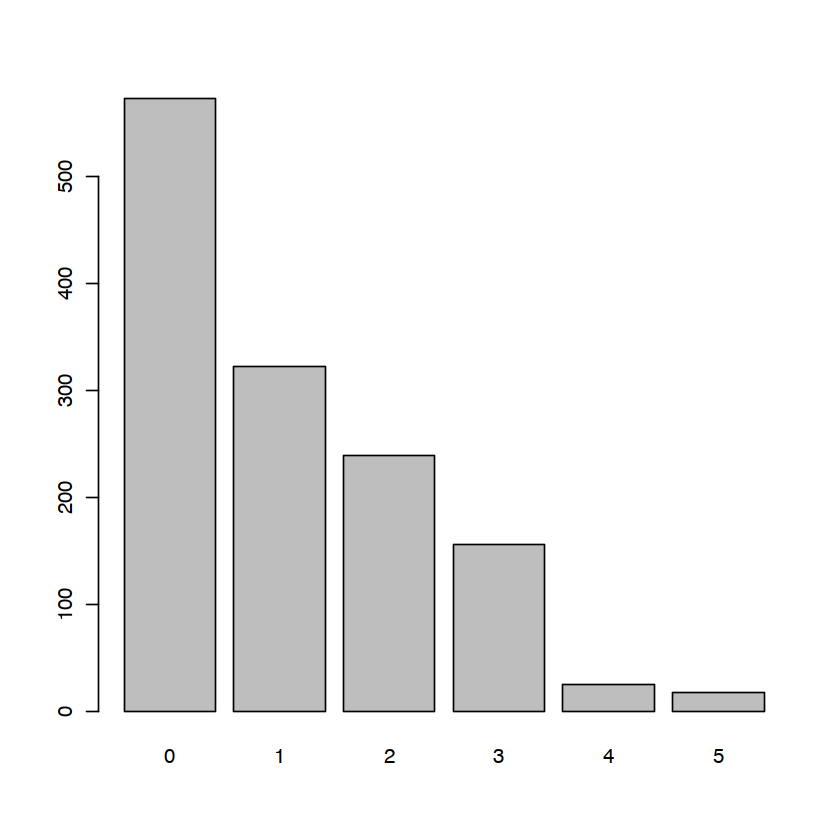

In [91]:
barplot(table(cleandata$children))

Die meisten Versicherten haben keine Kinder.

Es gibt keine Versicherten mit mehr als 5 Kindern, und kaum Versicherte mit mehr als 3 Kindern.

Generell geht deutlich hervor, dass es mehr Versicherte mit weniger Kindern gibt. Die Anzahl der Versicherten mit einer bestimmten Anzahl von Kindern sinkt stetig mit der Anzahl der Kinder.

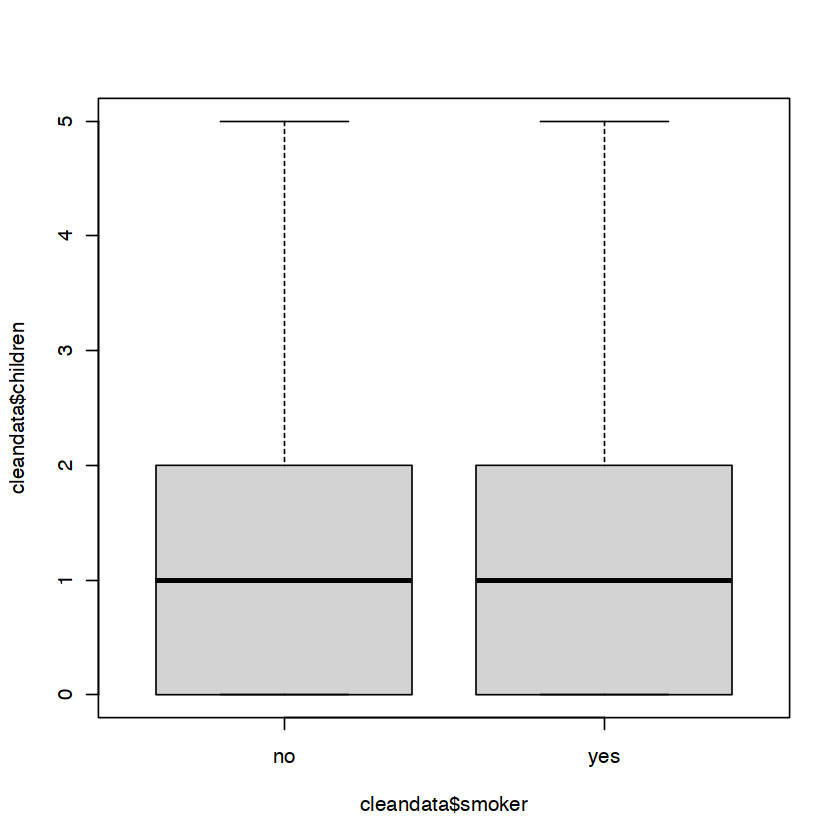

In [100]:
boxplot(cleandata$children ~ cleandata$smoker)

Raucher und Nichtraucher korrelieren identisch in der Anzahl der Kinder. Sprich: Raucher und Nichtraucher haben gleich viele Kinder.

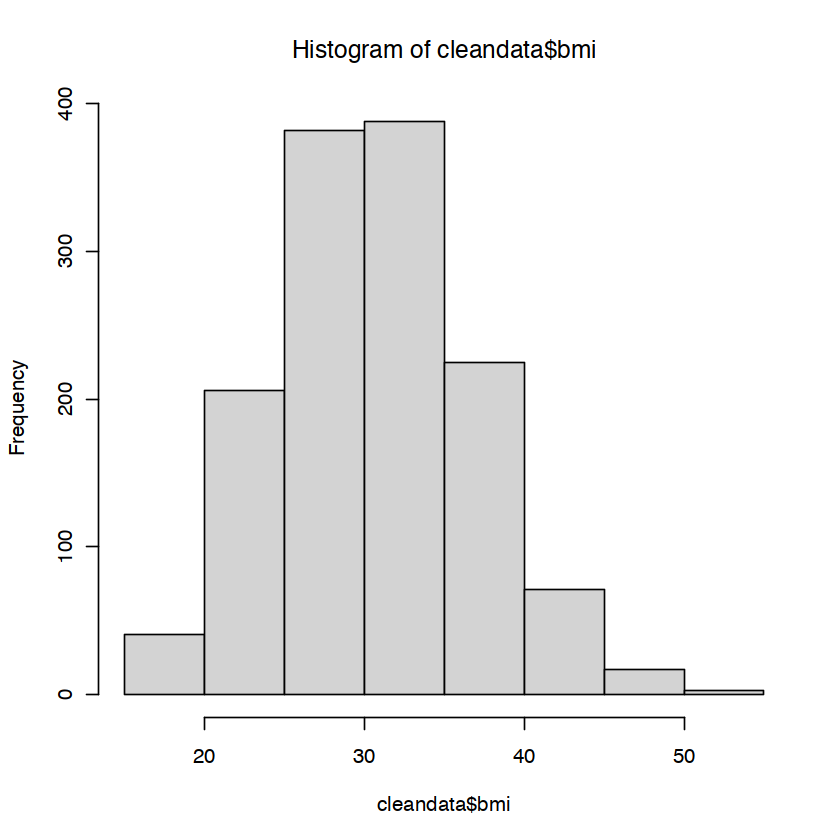

In [102]:
hist(cleandata$bmi)

Es macht keinen Sinn für das Merkmal bmi unterschiedlich breite Klassen zu verwenden. Würden unterschiedlich breite Klassen verwendet werden, müsste man darauf achten, dass die Flächen der einzelnen Klassen im korrekten Verhältnis zueinander stehen.

# 6. Kennzahlen

In [104]:
summary(cleandata)

      age            sex                 bmi           children    
 Min.   :18.00   Length:1333        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.32   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.24                      Mean   :30.68   Mean   :1.094  
 3rd Qu.:51.00                      3rd Qu.:34.70   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region             charges     
 Length:1333        Length:1333        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4746  
 Mode  :character   Mode  :character   Median : 9391  
                                       Mean   :13292  
                                       3rd Qu.:16658  
                                       Max.   :63770  

Der Unterschied besteht darin, dass bei metrischen Merkmalen die statistischen Grundgrößen Minimum, Maximum, Quartile, Median und Durschnitt angegeben sind, während bei den Nominalen Merkmalen lediglich die Anzahl der Beobachtungen sowie der Datentyp angegeben sind.

In [109]:
mean = mean(cleandata$charges)
sd = sd(cleandata$charges)

sprintf ("Arithmetisches Mittel (charges): %.2f", mean)
sprintf ("Standardabweichung (charges): %.2f", sd)

[1] "Arithmetisches Mittel (charges): 13291.61"

[1] "Standardabweichung (charges): 12121.96"

Das arithmetische Mittel sowie die Standardabweichung können angewendet werden, wenn es sich um metrische (quantitative) Daten handelt.

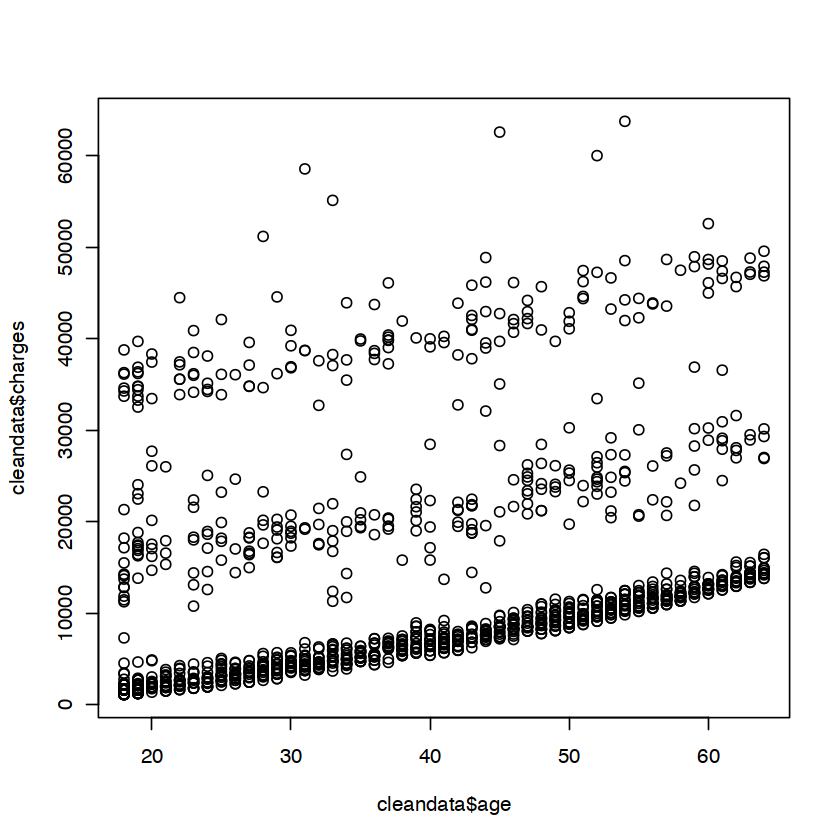

In [123]:
plot(cleandata$age, cleandata$charges)

Alter und Kosten korrelieren eindeutig, was auch Sinn macht, da man mit ansteigendem Alter allgemein mehr medizinische Betreuung benötigt.

Es lassen sich 3 "Bänder" identifizieren. Es wäre interessant zu wissen, welche Attribute neben der Hauptkorrelation zu den beiden anderen Häufungen führen.

# 7. Regressionsanalyse

# TODO

# Missing in Action: Punkt 4 und 7